# EDA - Ratings

In [16]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('../../')

from pathlib import Path

import pandas as pd
from sklearn.preprocessing import LabelEncoder

from src.util.data import get_interactions, get_sparsity_factor
from src.util.plot import Plot

RATINGS_PATH = Path('../../data/ratings_small.csv')

plot = Plot()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
ratings = pd.read_csv(RATINGS_PATH)

user_encoder = LabelEncoder()
user_encoder.fit(ratings['userId'].values)

movie_encoder = LabelEncoder()
movie_encoder.fit(ratings['movieId'].values)

interactions = get_interactions(
    ratings,
    user_encoder,
    movie_encoder
)

Building interaction matrix: 100%|██████████| 100004/100004 [00:00<00:00, 1724140.50it/s]


In [18]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [19]:
print(f'Data size: {len(ratings)}')

Data size: 100004


In [20]:
min_rating = ratings['rating'].values.min()
max_rating = ratings['rating'].values.max()

print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')

Min rating: 0.5
Max rating: 5.0


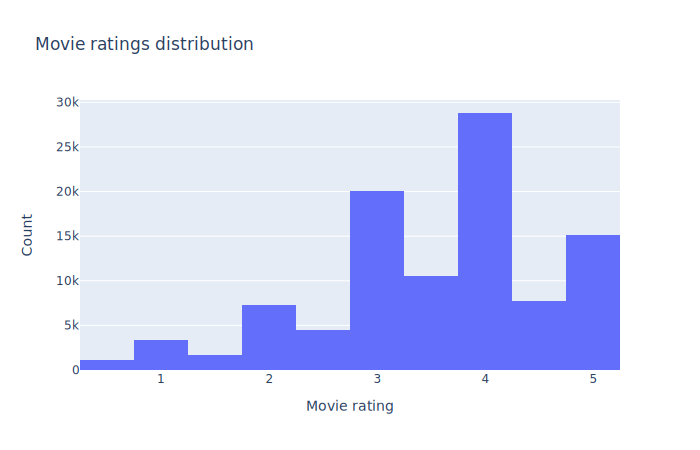

In [21]:
plot.histogram(
    x=ratings['rating'].values,
    title='Movie ratings distribution',
    xaxis_title='Movie rating',
    yaxis_title='Count'
)

In [22]:
sparsity_factor = get_sparsity_factor(interactions)
print(f'Sparsity factor: {(sparsity_factor * 100):.4}%')

Sparsity factor: 1.644%


In [23]:
movie_stats = ratings.groupby('movieId').agg({'rating': ['mean', 'std', 'count']})
movie_stats.columns = movie_stats.columns.get_level_values(1)

movie_stats.head()

,mean,std,count
movieId,,,
1,3.872470,0.958981,247
2,3.401869,0.880714,107
3,3.161017,1.150115,59
4,2.384615,0.938835,13
5,3.267857,0.948512,56


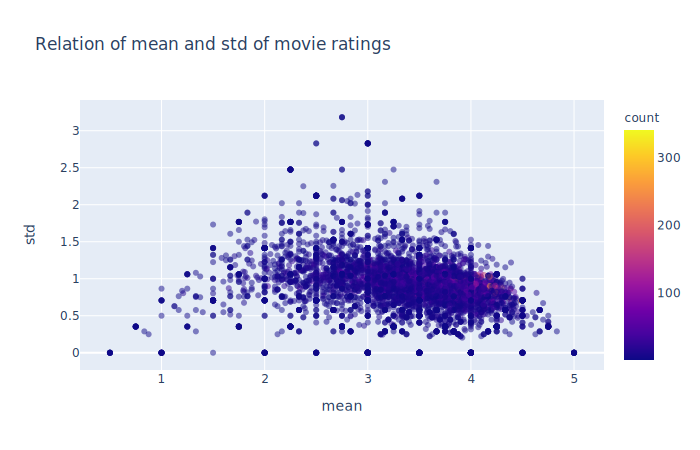

In [24]:
plot.relplot(
    x=movie_stats['mean'].values,
    y=movie_stats['std'].values,
    marker_color=movie_stats['count'].values,
    title='Relation of mean and std of movie ratings',
    names=['mean', 'std', 'count']
)

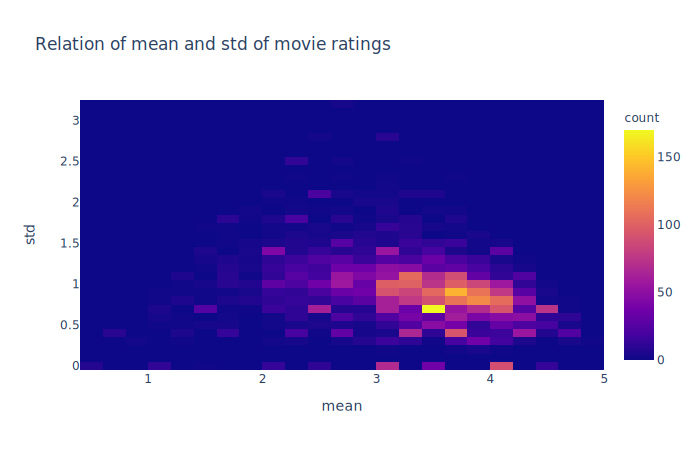

In [25]:
plot.histogram2d(
    x=movie_stats['mean'].values,
    y=movie_stats['std'].values,
    title='Relation of mean and std of movie ratings',
    names=['mean', 'std', 'count']
)

In [26]:
user_stats = ratings.groupby('userId').agg({'rating': ['mean', 'std', 'count']})
user_stats.columns = user_stats.columns.get_level_values(1)

user_stats.head()

,mean,std,count
userId,,,
1,2.550000,0.887041,20
2,3.486842,0.901753,76
3,3.568627,0.741752,51
4,4.348039,0.947616,204
5,3.910000,0.565775,100


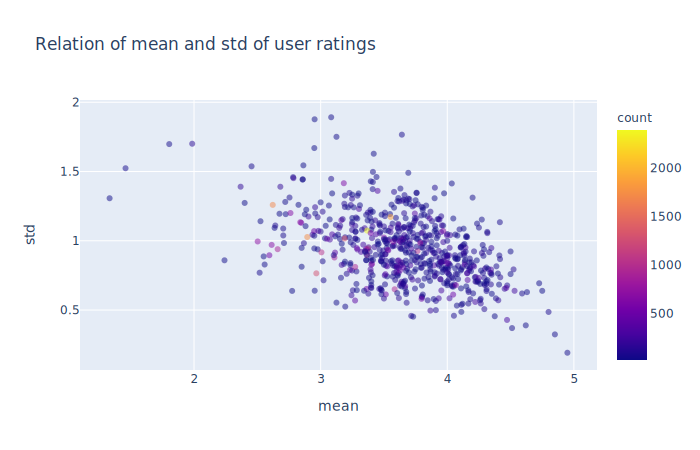

In [27]:
plot.relplot(
    x=user_stats['mean'].values,
    y=user_stats['std'].values,
    marker_color=user_stats['count'].values,
    title='Relation of mean and std of user ratings',
    names=['mean', 'std', 'count']
)

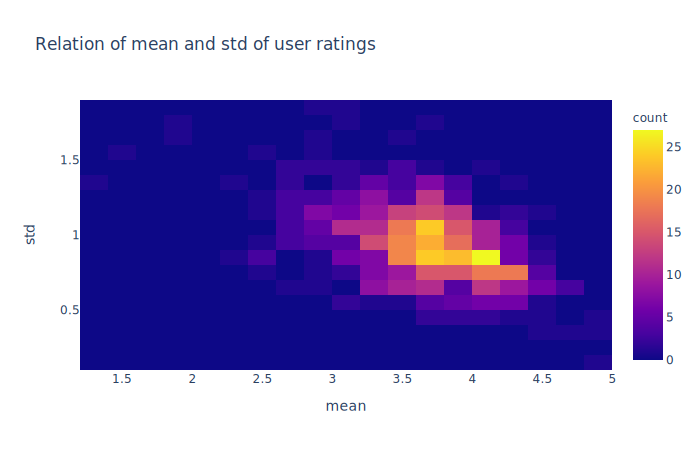

In [28]:
plot.histogram2d(
    x=user_stats['mean'].values,
    y=user_stats['std'].values,
    title='Relation of mean and std of user ratings',
    names=['mean', 'std', 'count']
)

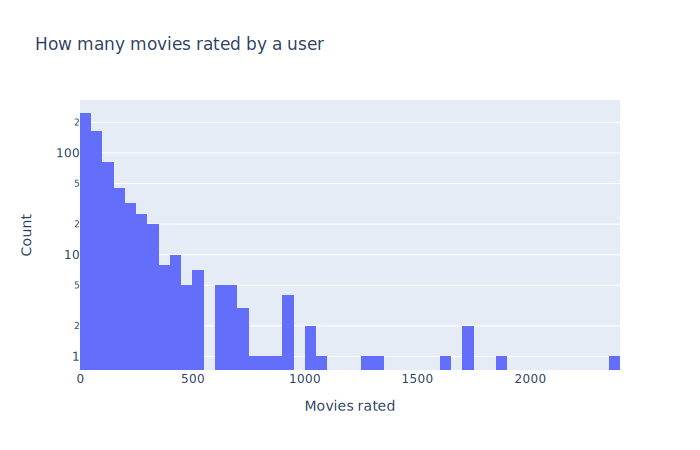

In [29]:
plot.histogram(
    x=user_stats['count'].values,
    title='How many movies rated by a user',
    xaxis_title='Movies rated',
    yaxis_title='Count',
    use_log_scale=True
)

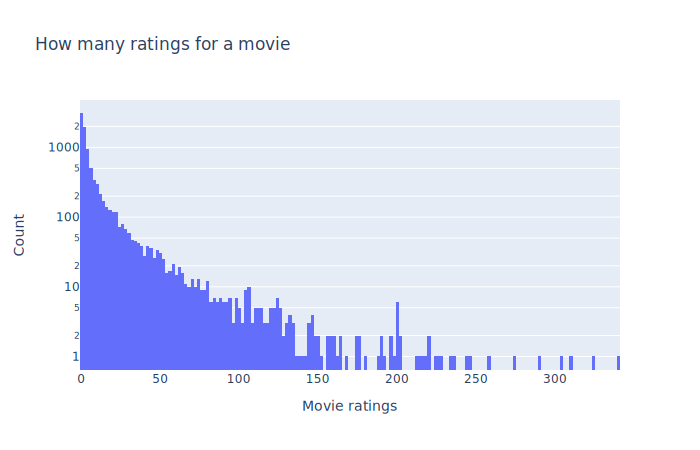

In [30]:
plot.histogram(
    x=movie_stats['count'].values,
    title='How many ratings for a movie',
    xaxis_title='Movie ratings',
    yaxis_title='Count',
    use_log_scale=True
)